In [25]:
import pickle
import sys
sys.path.append("../../spike")
import spike.multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))
    
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.spike_recording as recording

import spike.spike_analysis.pca_trajectories as pca_trajectories
import pickle


In [9]:
cagemate_collection = collection.SpikeCollection(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Habituation_Dishabituation (phase 1)\spike_data\sorted\cagemate")
novel_collection = collection.SpikeCollection(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Habituation_Dishabituation (phase 1)\spike_data\sorted\novel")

loading  11_cage_p1_merged.rec
loading  12_cage_p1_merged.rec
loading  13_cage_p1_merged.rec
loading  21_cage_p1_merged.rec
loading  22_cage_p1_merged.rec
loading  23_cage_p1_merged.rec
23_cage_p1_merged.rec has no good units
and will not be included in the collection
loading  31_cage_p1_merged.rec
loading  32_cage_p1_merged.rec
loading  33_cage_p1_merged.rec
loading  41_cage_p1_merged.rec
loading  44_cage_p1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject
loading  11_nov_p1_merged.rec
loading  12_nov_p1_merged.rec
loading  13_nov_p1_merged.rec
loading  21_nov_p1_merged.rec
loading  22_nov_p1_merged.rec
loading  23_nov_p1_merged.rec
23_nov_p1_merged.rec has no good units
and will not be included in the collection
loading  24_nov_p1_merged.rec
loading  32_nov_p1_merged.rec
loading  33_nov_p1_merged.rec
loading  41_nov_p1_me

In [12]:
behavior_dicts = unpickle_this('pilot2/habit_dishabit_phase1/behavior_dicts.pkl')


In [28]:
rec = recording.SpikeRecording(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Habituation_Dishabituation (phase 1)\spike_data\sorted\cagemate\24_cage_p1_merge.rec\phy")

cagemate_collection.collection.append(rec)



In [29]:
for recording in cagemate_collection.collection:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.event_dict = behavior_dicts[recording_pattern]
    print(recording_pattern)
    recording.subject = subject

for recording in novel_collection.collection:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.event_dict = behavior_dicts[recording_pattern]
    print(recording_pattern)
    recording.subject = subject

11_cage_p1_aggregated
12_cage_p1_aggregated
13_cage_p1_aggregated
21_cage_p1_aggregated
22_cage_p1_aggregated
31_cage_p1_aggregated
32_cage_p1_aggregated
33_cage_p1_aggregated
41_cage_p1_aggregated
44_cage_p1_aggregated
24_cage_p1_aggregated
11_nov_p1_aggregated
12_nov_p1_aggregated
13_nov_p1_aggregated
21_nov_p1_aggregated
22_nov_p1_aggregated
24_nov_p1_aggregated
32_nov_p1_aggregated
33_nov_p1_aggregated
41_nov_p1_aggregated
44_nov_p1_aggregated


In [30]:
pickle_this(novel_collection, 'novel_collection.pkl')
pickle_this(cagemate_collection, 'cagemate_collection.pkl')




In [21]:
cagemate_collection.analyze(timebin = 50, ignore_freq=0.5)
novel_collection.analyze(timebin = 50, ignore_freq=0.5)

All set to analyze
All set to analyze


In [35]:
import importlib
importlib.reload(pca_trajectories)

<module 'spike.spike_analysis.pca_trajectories' from 'c:\\Users\\megha\\Documents\\GitHub\\diff_fam_social_memory_ephys\\spike\\spike_analysis\\pca_trajectories.py'>

In [39]:
cagemate_collection.analyze(timebin = 50, ignore_freq = 0.5)

All set to analyze


Excluding 31_cage_p1_merged.rec with 1 neurons
Excluding 33_cage_p1_merged.rec with 2 neurons


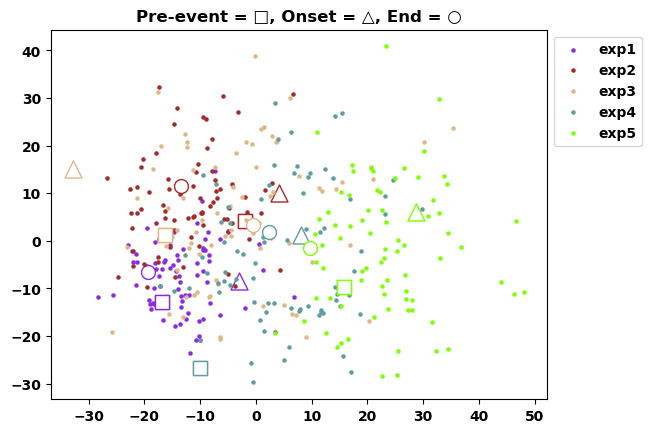

41


In [40]:
cagemate_pc_dict = pca_trajectories.avg_trajectories_pca(cagemate_collection, 3, 1, min_neurons=5, plot = True)
var = cagemate_pc_dict['explained variance']
total_var = 0
for i in range(len(cagemate_pc_dict['explained variance'])):
    total_var = total_var + cagemate_pc_dict['explained variance'][i]
    if total_var > .9:
        print(i)
        break